# Figures for the paper

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline

In [2]:
import PIL.Image as Image
import pickle

In [3]:
rc('text',usetex=True)
rc('text.latex',preamble=r'\usepackage{amssymb}')
rcParams['savefig.pad_inches'] = 0


In [4]:
SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

rc('font',size = BIGGER_SIZE)
rc('axes',titlesize = BIGGER_SIZE)
rc('axes',labelsize = BIGGER_SIZE)
rc('xtick',labelsize = BIGGER_SIZE)
rc('ytick',labelsize = BIGGER_SIZE)
rc('legend',handlelength= 1.0,fontsize = MEDIUM_SIZE)
rc('figure',titlesize = BIGGER_SIZE)

In [5]:
alphabet = []
for letter in range(65, 91):
    alphabet.append(chr(letter))
    
print(alphabet)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [6]:
def numbering_panels(axs,pos = None):
    if pos is None:
        pos = zeros((len(axs),2))
        pos[:,1] = 1-pos[:,1]
        
    for i,ax in enumerate(axs):
        ax.text(pos[i,0],pos[i,1],alphabet[i],horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    return

In [7]:
def plot_trace(data,t,ax=None,c='C0',band= None,label= None,linestyle='-'):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    if label is None:
        ax.plot(t,vtracso[:,250],c=c,linestyle=linestyle)
    else:
        ax.plot(t,vtracso[:,250],c=c,linestyle=linestyle,label=label)
        
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
    else:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    return(ax)

# Scale bars
def scalebar(ax,x0,y0,dx,dy,xlab = '', ylab = '', color = 'k'):
    xs = x0+linspace(0,dx,4)
    ax.vlines(x0,y0,y0+dy,color = color)
    ax.plot(xs,xs*0+y0,c = color)
    ax.text(x0,y0+dy*.3,ylab,horizontalalignment="right")   
    ax.text(x0+dx/2,y0-dy*0.02,xlab,verticalalignment="top",horizontalalignment="center")     


In [8]:
#Jupyters: Proper Spine Model - Inhibition.ipynb
with open("../SpineModel/dis_baselineB_disx5.pickle","rb") as f:
    vavgDiS,mesDiS,vtracsDiS,vtracsDDiS,vtracsSDiS,CtracsDiS,_,_ = pickle.load(f)

with open("../SpineModel/dis_baselineB_spsx5.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3 = pickle.load(f)

with open("../SpineModel/All_baseline_datasetx5.pickle","rb") as f:
    vavgT,mesT,vtracsT,vtracsDT,vtracsST,CtracsT,me2T,_,dataT = pickle.load(f)


In [9]:
modeldt = 0.05

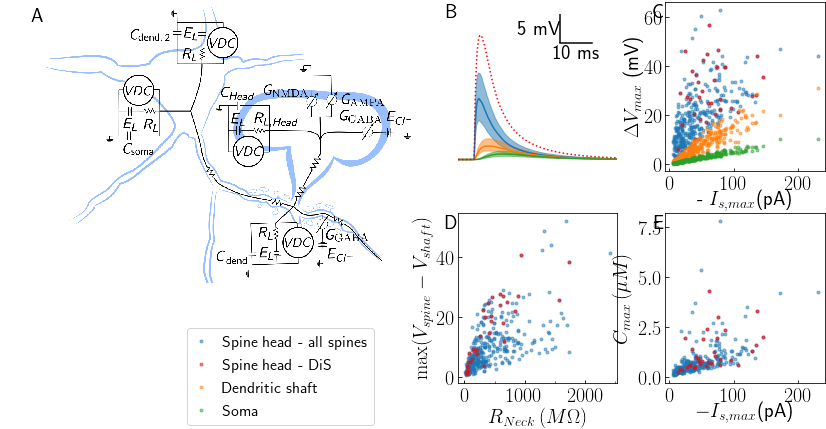

In [12]:
im = Image.open('../Neuron_persp3k2.png')
height = im.size[1]
im = np.array(im).astype(np.float) / 255
fig = figure(figsize=(14,7))
gs = mpl.gridspec.GridSpec(2, 4,  wspace=0.3, hspace=.25) # 2x3 grid

ax0 = fig.add_subplot(gs[:, 0:2]) # first full col
ax1 = fig.add_subplot(gs[0, 2]) # first row, second col
ax3 = fig.add_subplot(gs[0, 3]) # first row, third col
ax2 = fig.add_subplot(gs[1, 2]) # 2nd row, second col
ax4 = fig.add_subplot(gs[1, 3]) # 2nd row, 3rd col

ax0.imshow(im)
ax0.set_axis_off()


# Plots in fig EPSP
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100+5,ax1,c='C0',band = 1)
plot_trace(vtracsD,arange(vtracsD.shape[0])*modeldt-100+5,ax1,c='C1',band = 1)
plot_trace(vtracsS,arange(vtracsS.shape[0])*modeldt-100+5,ax1,c='C2',band = 1)
plot_trace(vtracsDiS,arange(vtracs.shape[0])*modeldt-100+5,ax1,c='r',band = 0,linestyle=':')




# Plot in fig Delta V - V_dend
s0 = dataT['A2']>0
ax2.plot(abs(mesT[:,0]),mesT[:,1]-mesT[:,2],'.',label="Spine head",alpha=0.5)
ax2.plot(abs(mesT[s0,0]),mesT[s0,1]-mesT[s0,2],'r.',label="Spine head",alpha=0.5)

# Plot in fig Calcium
ax4.plot(abs(mesT[:,-3]/1e-3),mesT[:,4],'.',label="Spine head",alpha=0.5)
ax4.plot(abs(mesT[s0,-3]/1e-3),mesT[s0,4],'r.',label="Spine head",alpha=0.5)

# Plot in fig Delta V max
EL0 = -70
ax3.plot(abs(mesT[:,-3]/1e-3),mesT[:,1],'C0.',label="Spine head - all spines",alpha=0.5)
ax3.plot(abs(mesT[s0,-3]/1e-3),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
ax3.plot(abs(mesT[:,-3]/1e-3),me2T[:,4]-EL0,'C1.',label="Dendritic shaft",alpha=0.5)
ax3.plot(abs(mesT[:,-3]/1e-3),mesT[:,3],'C2.',label="Soma",alpha=0.5)
#ax3.plot(abs(mesT[s0,-3]/1e-3),mesT[s0,3],'r.',label="Spine head",alpha=0.5)


# Accesories

scalebar(ax1,52,-50,10,5,xlab = '10 ms', ylab = '5 mV', color = 'k')
ax1.set_axis_off()
ax2.set_xlabel("$R_{Neck}\, (M\Omega)$")
ax2.set_ylabel("$\max(V_{spine}-V_{shaft})$")
ax4.set_xlabel("$- I_{s,max}$(pA)")
ax4.set_ylabel("$C_{max}\, (\mu M)$")
ax3.set_xlabel("- $I_{s,max}$(pA)")
ax3.set_ylabel("$\Delta V_{max}$ (mV)")
ax3.tick_params(direction="in")
ax4.tick_params(which='both',direction="in")
ax2.tick_params(direction="in")
ax3.set_xticks(ticks=arange(0,300,100))
ax4.set_xticks(ticks=arange(0,300,100))
ax2.set_xticks(ticks=arange(0,600,200))

ax2.xaxis.set_minor_locator(FixedLocator(arange(0,4000,500)))
ax2.xaxis.set_major_locator(FixedLocator(arange(0,4000,1000)))
ax2.xaxis.set_tick_params(which='minor',direction='in')
ax4.xaxis.set_label_coords(0.5,-0.12)
ax2.yaxis.set_label_coords(-.15,0.5)
ax3.yaxis.set_label_coords(-.13,0.5)
ax3.xaxis.set_label_coords(0.5,-0.12)
#ax4.yaxis.set_label_coords(-.15,0.5)

ax3.legend(loc = (-3.0,-1.5))

ax1.set_xlim(20,70)
ax1.set_ylim(-72,-43)
#ax4.set_ylim(0,4.5)
axs = [ax0,ax1,ax3,ax2,ax4]
numbering_panels(axs)
savefig("Figure_Model_1bx5.png",dpi = 300, tight_layout = True)

In [13]:
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0, cmap = cm.Blues_r):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=cmap, cmap_range=(0,1.0),direction=1)

#plot(randn(5))
#ax = gca()
#ax.set(autoscale_on=False)
#gradient_bar(ax,[0],[0],3.,1.0)
#ax.set_aspect('auto')  

AMPA 1.0750556815368328
3.8376418216567427


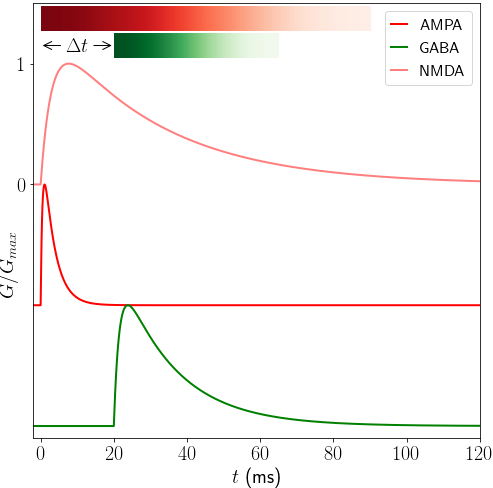

In [14]:
figure(figsize=(8,8))

xs = linspace(0,120,1000)
ton, toff = (0.5,3.0)
trise = ton*toff/(ton-toff)*log(ton/toff)
print('AMPA',trise)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1,'r-',linewidth= 2,label='AMPA')
ax = gca()
ax.set(autoscale_on=False)

ton, toff = (1.5,15.0)
trise = ton*toff/(ton-toff)*log(ton/toff)
print(trise)
ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
plot(concatenate(([-10],xs+20)),concatenate(([0],ygaba))-1-1,'g-',linewidth= 2,label='GABA')
gradient_bar(ax,[20],[1.25],3*toff,1.05,cmap = cm.Greens_r)
ax.set_yticks(ticks=array([0,1.]))

ton, toff = (3,30.0)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'r-',linewidth= 2,alpha=0.5,label='NMDA')
gradient_bar(ax,[0],[1.27+.2],3*toff,1.27,cmap = cm.Reds_r)


ax.set_aspect('auto')

ax.set_xlim(-2,120)
ax.set_ylim(-2.1,1.5)
ax.set_xlabel('$t$ (ms)')
ax.set_ylabel('$G/G_{max}$')
ax.yaxis.set_label_coords(-0.03,0.4)
ax.legend()
ax.annotate('$\Delta t$',xy = (7,1.1))
ax.annotate('',xy = (6,1.15),xytext = (0,1.15),arrowprops=dict(arrowstyle="<-"))
ax.annotate('',xy = (14,1.15),xytext = (20,1.15),arrowprops=dict(arrowstyle="<-"))

savefig('conductances3.pdf')

In [47]:
#Jupyter notebook: Proper Spine Model - Inhibition.ipynb
data = {}

with open("../SpineModel/dis_baselinex5.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_baseline"] = [vtracs,Ctracs]
with open("../SpineModel/dis_ga_glu05x5.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gaglu"] = [vtracs,Ctracs]
with open("../SpineModel/dis_glu_ga05x5.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gluga"] = [vtracs,Ctracs]
#with open("sis_ga_glu.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gaglu"] = [vtracs,Ctracs]
#with open("sis_glu_ga.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gluga"] = [vtracs,Ctracs]

with open("inhibition_disx5.pickle","rb") as f:
    tdels,inhtimDis,_,tauDis = pickle.load(f)

# Jupyter notebook: Proper Spine Model - Inhibition outside
with open("inhibition_sis_01x5.pickle","rb") as f:
    tdels,inhtimSis,_,tauSis = pickle.load(f)


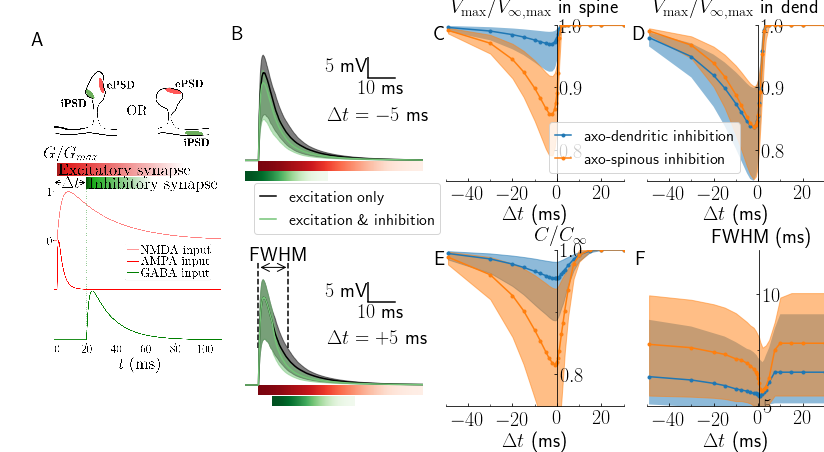

In [45]:
#height = im.size[1]
#im = np.array(im).astype(np.float) / 255
im = Image.open('../spine-inh_sketch_bothj.png')
height = im.size[1]
im = np.array(im).astype(np.float) / 255

fig = figure(figsize=(14,7))
gs = mpl.gridspec.GridSpec(6,8,  wspace=0.3, hspace=11) # 2x3 grid
ax0 = fig.add_subplot(gs[:, :2]) # first full col

ax1 = fig.add_subplot(gs[:3, 2:4]) # first row, second col
ax3 = fig.add_subplot(gs[3:, 2:4]) # 2nd row, second col

ax2 = fig.add_subplot(gs[:3, 4:6]) # first row, third col
ax4 = fig.add_subplot(gs[3:, 4:6]) # first full col
ax0b = fig.add_subplot(gs[3:, 6:]) # 2nd row, 3rd col
ax5 = fig.add_subplot(gs[:3, 6:]) # 2nd row, 3rd col

# Sketch
ax0.imshow(im)
ax0.set_axis_off()

# Fig EPSP GABA-Glu dt = -5ms
vtracs = data["dis_baseline"][0]+70
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100,ax1,c='k',band = 1)

vtracs = data["dis_gaglu"][0]+70
cG = cm.Greens(0.5)
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100,ax1,c=cG,band = 1)
ax1.set_xlim(15,80)
ax1.set_axis_off()

# Fig EPSP Glu-GABA dt = +5ms

vtracs = data["dis_baseline"][0]+70
#plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax3,c='k')
#vtracs = data["dis_gaglu"][1]
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100,ax3,c='k',band = 1,label='excitation only')

#vtracs = data["dis_baseline"][1]
#plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax3,c='k')
vtracs = data["dis_gluga"][0]+70
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100,ax3,c=cG,band = 1,label='excitation \& inhibition')
ax3.set_xlim(15,80)
#ax1.set_ylim(-67,-20)
ax3.set_axis_off()
#plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax2,c='C1')
#plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax2,c='C2')
#ax3.text(50,1,"$Ca^{2+}$")

vm,sl,sv = inhtimSis[:,0],inhtimSis[:,1],inhtimSis[:,2]
ax2.plot(tdels,vm,'C0.-',label='axo-dendritic inhibition')
ax2.fill_between(tdels,sl,sv,alpha=0.5)

vm,sl,sv = inhtimSis[:,3*5],inhtimSis[:,3*5+1],inhtimSis[:,3*5+2]
ax4.plot(tdels,vm,'C0.-',label='axo-dendritic inhibition')
ax4.fill_between(tdels,sl,sv,alpha=0.5,color='C0')
#ax2.set_axis_off()

vm,sl,sv = inhtimDis[:,0],inhtimDis[:,1],inhtimDis[:,2]
ax2.plot(tdels,vm,'C1.-',label='axo-spinous inhibition')
ax2.fill_between(tdels,sl,sv,color='C1',alpha=0.5)

vm,sl,sv = inhtimDis[:,3*5],inhtimDis[:,3*5+1],inhtimDis[:,3*5+2]
ax4.plot(tdels,vm,'C1.-',label='axo-spinous inhibition')
ax4.fill_between(tdels,sl,sv,color='C1',alpha=0.5)

vm,sl,sv = inhtimSis[:,1*5],inhtimSis[:,1*5+1],inhtimSis[:,1*5+2]
ax5.plot(tdels,vm,'C0.-',label='axo-dendritic inhibition')
ax5.fill_between(tdels,sl,sv,alpha=0.5)

vm,sl,sv = inhtimDis[:,1*5],inhtimDis[:,1*5+1],inhtimDis[:,1*5+2]
ax5.plot(tdels,vm,'C1.-',label='axo-spinous inhibition')
ax5.fill_between(tdels,sl,sv,color='C1',alpha=0.5)


#ax0btwin = ax0b.twinx()
#vm,sv = tauDis[:,2],tauDis[:,3]
#ax0btwin.plot(tdels,vm,'C1.-',label='In spine head')
##ax4twin.fill_between(tdels,vm+sv,vm-sv,color='C1',alpha=0.5)

vm,sl,sv = tauSis[:,0],tauSis[:,1],tauSis[:,2]
ax0b.plot(tdels,vm,'C0.-',label='axo-dendritic inhibition')
ax0b.fill_between(tdels,sl,sv,alpha=0.5)

vm,sl,sv = tauDis[:,0],tauDis[:,1],tauDis[:,2]
ax0b.plot(tdels,vm,'C1.-',label='axo-spinous inhibition')
ax0b.fill_between(tdels,sl,sv,color='C1',alpha=0.5)





ax2.set_ylim(0.75,1.0)
ax5.set_ylim(0.75,1.0)


ax2.spines['left'].set_color('none')
#ax2.spines['bottom'].set_color('none')
ax2.set_yticks(ticks=[0.8,0.9,1.0])
#ax2.set_xticks(ticks=arange(-50,70,20))
ax2.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax2.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax2.tick_params(axis='x', pad = 10)
ax2.yaxis.tick_right()
# Eliminate upper and right axes
ax2.spines['right'].set_position(('data',0.0))
ax2.spines['top'].set_position(('data',0.75))
#ax2.annotate('$V/V_{\\varnothing}$\n in spine',xy = (20,0.9))
ax2.spines['top'].set_color('none')
#ax2.xaxis.set_visible(False)
#ax2.set_ylim(.68,1.)


ax5.spines['left'].set_color('none')
#ax5.spines['bottom'].set_color('none')
ax5.spines['top'].set_color('none')
ax5.set_yticks(ticks=[0.8,0.9,1.0])
#ax2.set_xticks(ticks=arange(-50,70,20))
ax5.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax5.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax5.tick_params(axis='x', pad = 10)
ax5.yaxis.tick_right()
# Eliminate upper and right axes
ax5.spines['right'].set_position(('data',0.0))
ax5.spines['top'].set_position(('data',0.75))
ax5.spines['top'].set_color('none')
#ax5.xaxis.set_visible(False)

ax4.spines['left'].set_color('none')
#ax4.spines['bottom'].set_color('none')
ax4.set_yticks(ticks=[0.6,0.8,1.0])
#ax4.set_xticks(ticks=[0])
ax4.yaxis.set_minor_locator(FixedLocator(arange(0.7,1.1,0.2)))
#ax4.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))

ax4.yaxis.tick_right()
#ax4.xaxis.tick_top()

# Eliminate upper and right axes
ax4.spines['right'].set_position(('data',0.0))
ax4.spines['bottom'].set_position(('data',0.750))
ax4.spines['top'].set_color('none')
#ax4.xaxis.set_visible(False)
#ax4.xaxis.tick_top()
ax4.set_ylabel('$C/C_{\infty}$', rotation = 0)
ax4.set_ylim(0.75,1.0)

ax0b.spines['top'].set_color('none')
ax0b.spines['left'].set_color('none')
#ax0b.spines['bottom'].set_color('none')
ax0b.yaxis.set_minor_locator(FixedLocator(arange(3,11,2)))
ax0b.yaxis.set_major_locator(FixedLocator(arange(4,12,2)))

#ax2.set_xticks(ticks=arange(-50,70,20))
#ax0b.tick_params(axis='x', pad = 10)
ax0b.yaxis.tick_right()
#ax0b.xaxis.tick_top()
# Eliminate upper and right axes
ax0b.spines['right'].set_position(('data',0.65))
#ax0b.spines['top'].set_color('none')
#ax0b.xaxis.set_visible(False)
ax0b.set_ylabel('FWHM (ms)', rotation = 0)


ax1.set(autoscale_on=False)
ax3.set(autoscale_on=False)
ax1.set(ylim=(-5,32.8),autoscale_on=False)
ax3.set(ylim=(-5,32.8),autoscale_on=False)
#ax1.plot(linspace(50,100),linspace(10,20)*0+2)
gradient_bar(ax1,[20],[-0.3],60.,-2.5,cmap = cm.Reds_r)
gradient_bar(ax1,[15],[-2.8],30.,-5,cmap = cm.Greens_r)

gradient_bar(ax3,[20],[-0.3],60.,-2.5,cmap = cm.Reds_r)
gradient_bar(ax3,[25],[-2.8],30.,-5.0,cmap = cm.Greens_r)

ax1.set_aspect('auto')
ax3.set_aspect('auto')
scalebar(ax3,60,20,10,5,'$10$ ms','$5$ mV')
scalebar(ax1,60,20,10,5,'$10$ ms','$5$ mV')

#gs.tight_layout(fig, rect=[.5,.5, 1, 1], h_pad=0.)#pad=0.4, w_pad=0.5, h_pad=4.0)
#print(xy1,sel)
#subplot_tool()

ax0b.set_xlabel('$\Delta t$ (ms) ')
ax4.set_xlabel('$\Delta t$ (ms) ')
ax5.set_xlabel('$\Delta t$ (ms) ')
ax2.set_ylabel('$V_{\max}/V_{\infty,\max}$ in spine', rotation = 0)
ax5.set_ylabel('$V_{\max}/V_{\infty,\max}$ in dend',rotation = 0)

ax4.yaxis.set_label_coords(0.65,1.01)
ax0b.yaxis.set_label_coords(0.65,1.01)
ax2.yaxis.set_label_coords(0.5,1.03)
ax5.yaxis.set_label_coords(0.5,1.03)
ax4.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax4.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax0b.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax0b.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax0b.yaxis.set_major_locator(FixedLocator(arange(5,15,5)))
#ax0b.yaxis.set_minor_locator(FixedLocator(arange(4,14,4)))
ax0b.yaxis.set_minor_locator(FixedLocator(arange(2.5,17.5,5)))

#
#ax2.set_xticklabels([])
#ax5.set_xticklabels([])
ax5.xaxis.set_label_coords(0.5,-0.15)
ax2.set_xlabel('$\Delta t$ (ms) ')
ax2.xaxis.set_label_coords(0.5,-0.15)
ax2.tick_params(which='minor',direction='in')
ax2.tick_params(which='major',direction='in')
ax4.tick_params(which='minor',direction='in')
ax4.tick_params(which='major',direction='in')
ax5.tick_params(which='minor',direction='in')
ax5.tick_params(which='major',direction='in')
ax0b.tick_params(which='minor',direction='in')
ax0b.tick_params(which='major',direction='in')
ax2.tick_params(pad=2.5)
ax5.tick_params(pad=2.5)

ax0b.set_ylim(5,12)

xl0,xlf = -50,30
ax0b.set_xlim(xl0,xlf)
ax5.set_xlim(xl0,xlf)
ax4.set_xlim(xl0,xlf)
ax2.set_xlim(xl0,xlf)
ax1.annotate('$\Delta t=-5$ ms',xy = (45,10))
ax3.annotate('$\Delta t=+5$ ms',xy = (45,10))
#ax0b.legend(loc = (-0.47,0.05))
ax5.legend(loc = (-0.55,0.05))

ax3.legend(loc=(0.05,1.1))
#ax3.arrow(50+22,.9*exp(-1.0),60,0.,head_width=0.2,head_length=20)
ax3.annotate("", xy=(20+3+8,28.5), xytext=(20,28.5),
    arrowprops=dict(arrowstyle="<->"))
#ax3.vlines(20+3,0.1,18,linestyle='--')
ax3.vlines(20,18/2,30,linestyle='--')
ax3.vlines(20+3+8,18/2,30,linestyle='--')

ax3.annotate('FWHM',xy = (17,30))

ax1.annotate('DiS: $V_{\\rm spine}$',xy = (40,35))


axs = [ax0,ax1,ax2,ax5,ax4,ax0b]
numbering_panels(axs)

xst = linspace(0,200,2000)
biexp = exp(-xs/10.0)-exp(-xs/1.3)
biexp = biexp/max(biexp)
#ax1.plot(xs+20,biexp*25,'--',linewidth=2)

savefig('f2x5.png',dpi = 300,tight_layout = True)

In [145]:
vm,sl,sv = tauDis[:,0],tauDis[:,1],tauDis[:,2]
print(vm.shape,sl.shape,sv.shape)

(24,) (24,) (24,)


In [23]:
def running_mean(x, N, padding = "valid"):
    if padding =="same":
        N2 = N//2
        Nf = float(N)
        cumsumt = cumsum(concatenate((zeros(1),x,zeros(N-1))))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runmean[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
    elif padding =="valid":
        cumsumt = cumsum(insert(x, 0, 0))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / float(N)
    return(runmean)
def running_std(x, N, padding = "valid"):
    if padding =="same":
        N2 = N//2
        Nf = float(N)
        cumsumt = cumsum(concatenate((zeros(1),x,zeros(N-1))))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runmean[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
        cumsumt = cumsum(concatenate((zeros(1),x*x,zeros(N-1))))
        runstd = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runstd[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
        runstd = sqrt(runstd-runmean**2)
    elif padding =="valid":
        cumsumt = cumsum(insert(x, 0, 0))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / float(N)
        
        cumsumt = cumsum(insert(x**2, 0, 0))
        runstd = (cumsumt[N:] - cumsumt[:-N]) / float(N)
        runstd = sqrt(runstd-runmean**2)
    return(runstd)

In [18]:
# From notebook: Proper Spine Model - Inhibition 
with open("../SpineModel/dis_baselineB_spsx5.pickle","rb") as f:
    _,mesSPS,_,_,_,_,_,_ = pickle.load(f)

with open("../SpineModel/dis_baselineB_disx5.pickle","rb") as f:
    _,mesDiS,_,_,_,_,_,_ = pickle.load(f)

with open("../SpineModel/SPS_Voltagedistx1e5_temp.pickle","rb") as f:
            mVs = pickle.load(f) 
with open("../SpineModel/SPS_InhVoltagedistx1e5_temp.pickle","rb") as f:
            mVIs = pickle.load(f) 

In [20]:
# From notebook:
with open("electrotonicL.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3 = pickle.load(f)
    


mm = me3*1.0
mm = column_stack((me2[:,0],mm))
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = arange(0,10)*7.5
mmn = 1.0*mm
mtn,mtsn = mt,mts

mm = me2*1.0
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = -arange(0,10)*7.5
ms = mean((mes[:,3]+65)/mm[:,0])
mss = std((mes[:,3]+65)/mm[:,0])

In [26]:
#From notebook: Proper Spine Model - Gating info 2
with open("gatinginfo_0_temp.pickle","rb") as f:
    fapS,fapD,fap0,fapC = pickle.load(f)
with open("gatinginfo_u.pickle","rb") as f:
    fapSu,fapDu,fap0u,fapCu = pickle.load(f)
with open("gatinginfo_f_bRn.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
with open("gatinginfo_h.pickle","rb") as f:
    fapSh,fapDh,fap0h,fapCh,fdath = pickle.load(f)

#From notebook: Electrotonic Figures + Proper Spine Model - Gaing Info2 - Electrotonic revisited
with open("gatinginfo_inh_electrotonic.pickle","rb") as f:
    shle,shleh,shle0,shleh0  = pickle.load(f)
    

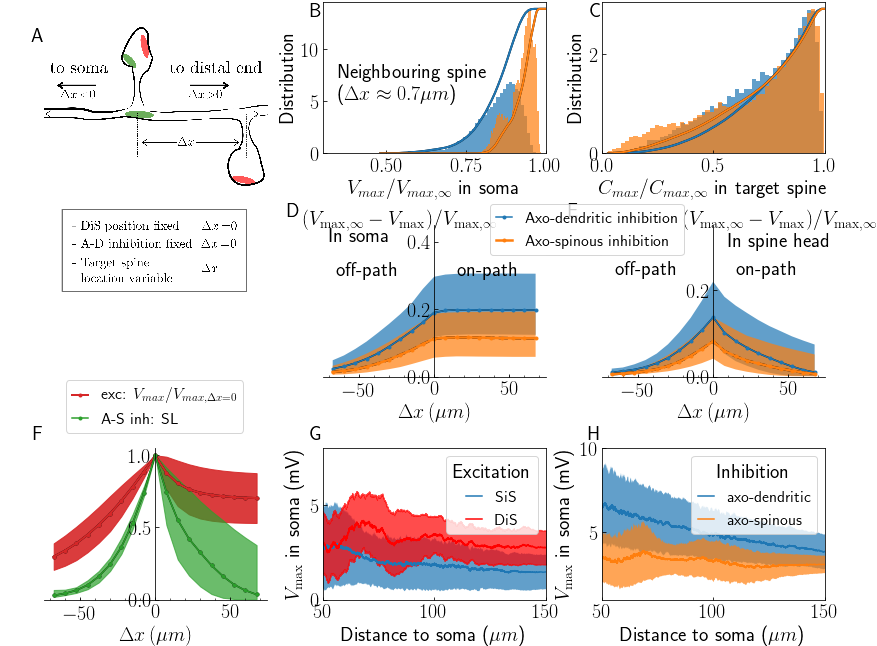

In [43]:
im = Image.open('../dendinteh.png')

fig = figure(figsize=(14,11))
gs = mpl.gridspec.GridSpec(3, 3,  wspace=0.25, hspace=0.47) # 2x3 grid
ax0 = fig.add_subplot(gs[0:2, 0]) # first full col
ax2 = fig.add_subplot(gs[0, 1]) # first row, second col
ax1 = fig.add_subplot(gs[0, 2]) # first row, third col
ax4 = fig.add_subplot(gs[1, 1]) # 2nd row, second col
ax3 = fig.add_subplot(gs[1, 2]) # 2nd row, 3rd col
axl1 = fig.add_subplot(gs[2, 0]) # lower row, 1st col
axl2 = fig.add_subplot(gs[2, 1]) # lower row, second col
axl3 = fig.add_subplot(gs[2, 2]) # lower row, 3rd col

xt = -arange(0,10)*7.5
axl1.fill_between(xt,mt-mts,mt+mts,alpha=0.9,color='C3')
axl1.plot(xt,mt,'k.-',linewidth=2)
axl1.plot(xt,mt,'C3.-',label='exc: $V_{max}/V_{max,\Delta x = 0}$',linewidth=2)
axl1.fill_between(-xt,mtn-mtsn,mtn+mtsn,color='C3',alpha=0.9)
axl1.plot(-xt,mtn,'k.-',linewidth=2)
axl1.plot(-xt,mtn,'C3.-',linewidth=2)
#axsp = 0
#lab = 'Vspine'
#ax0b.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'C1--',label='ax-dend: $ShntI/ShntI_0$')
#ax0b.fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color='C1',alpha=0.7)
axsp = 1
lab = 'Vspine'
# : $ShntI/ShntI_0$
axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'k.-')
axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'C2.-',label='A-S inh: SL')
axl1.fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color='C2',alpha=0.7)
axl1.set_ylim(0,1.05)
axl1.spines['left'].set_position(('data',0.0))
axl1.spines['top'].set_color('none')
axl1.spines['right'].set_color('none')
axl1.set_xlabel('$\Delta x\, (\mu m)$')
#axl1.set_ylabel('SL')
#ax0b.xaxis.set_visible(False)

ax0.imshow(im)
#ax0.text(0.5,5,"distance to the soma")
ax0.set_axis_off()

h2 = ax2.hist(fapDf[:,1]/fapDf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = ax2.hist(fapDf[:,2]/fapDf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=2)
ax2.plot(htx,hty*myl,'C0',linewidth=2)

htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=2)
ax2.plot(htx,hty*myl,'C1',linewidth=2)

h2 = ax1.hist(fapCf[:,1]/fapCf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = ax1.hist(fapCf[:,2]/fapCf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
myl = max([h2[0].max(),ht[0].max()])
mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,'C0',linewidth=2)
htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,'C1',linewidth=2)


#h2 = ax2.hist(fap0[:,1]/fap0[:,0],51,alpha=0.7,label='shaft2',color = 'C3',density=True)
#ht = ax2.hist(fap0[:,2]/fap0[:,0],51,label='DiS2',color = 'C4',density=True,alpha=0.7)
#ax2.legend()

#htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
#hty = cumsum(h2[0])/sum(h2[0])
#ax2.plot(htx,hty*8,'C3')

#htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
#hty = cumsum(ht[0])/sum(ht[0])
#ax2.plot(htx,hty*8,'C4')


#h2 = ax4.hist((fapDh[:,2]-fapDh[:,1])/fapDh[:,0],51,alpha=0.7,density=True)
#ht = ax4.hist((fapD[:,2]-fapD[:,1])/fapD[:,0],51,alpha=0.7,density=True)
#ax4.text(0.3,4,'$\\frac{V_{DiS}-V_{inh\,out}}{V_{no\,inh}}$',fontsize=14)
#ax4.set_ylim(0,6)

#htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
#hty = cumsum(h2[0])/sum(h2[0])
#ax4.plot(htx,hty*max(ht[0]),'C0')
#p1 = hty[htx>0][0]
#htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
#hty = cumsum(ht[0])/sum(ht[0])
#ax4.plot(htx,hty*max(ht[0]),'C1')
#p2 = hty[htx>0][0]

#print(p1,p2)





#h2 = ax3.hist((fapCh[:,2]-fapCh[:,1])/fapCh[:,0],51,alpha=0.7,density=True)
#ht = ax3.hist((fapC[:,2]-fapC[:,1])/fapC[:,0],51,alpha=0.7,density=True)
#
#htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
#hty = cumsum(h2[0])/sum(h2[0])
#ax3.plot(htx,hty*max(ht[0]),'C0')
#
#htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
#hty = cumsum(ht[0])/sum(ht[0])
#ax3.plot(htx,hty*max(ht[0]),'C1')
#ax3.set_ylim(0,max(ht[0])*1.05)
axss = [ax3,ax4]
axsp = 0
# ['Vspine','Vsoma','Vdendrite']
for i,lab in enumerate(['Vspine','Vsoma']):
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k')
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'.-',label='Axo-dendritic inhibition')
    axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7)
ax4.spines['left'].set_position(('data',0.0))
ax4.spines['top'].set_color('none')
ax4.spines['right'].set_color('none')
#ax4.set_ylabel('Shunting Level')
ax4.set_xlabel('$\Delta x\, (\mu m)$')
#ax4.legend()

axsp = 1
for i,lab in enumerate(['Vspine','Vsoma']):
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k--',linewidth=2.5)
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'C1.-',linewidth=2.5,label='Axo-spinous inhibition')
    axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7)

#axsp = 0
#for lab in ['Ca']:
#    ax3.plot(shle[lab][:,0],shle[lab][:,1+axsp*5],label='ax-sp inh')
#    ax3.fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7)
#
#axsp = 1
#for lab in ['Ca']:
#    ax3.plot(shleh[lab][:,0],shleh[lab][:,1+axsp*5],label='ax-sp inh')
#    ax3.fill_between(shleh[lab][:,0],shleh[lab][:,2+axsp*5],shleh[lab][:,3+axsp*5],alpha=0.7)
#
#ax3.spines['left'].set_position(('data',0.0))
#ax3.spines['top'].set_color('none')
#ax3.spines['right'].set_color('none')
##ax3.set_ylabel('Shunting Level Calcium')
#ax3.set_xlabel('$\Delta x\, (\mu m)$')
##ax3.legend()




sel = mVs[:,-2] == 1
mVav = mVs[:,2].mean()
s1 = permutation(arange(mVs.shape[0])[sel])
s2 = permutation(arange(mVs.shape[0])[~sel])


xt,yt = mVs[s1,-1],mVs[s1,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
axl2.plot(xt,yt,label='SiS')
axl2.fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)


xt,yt = mVs[s2,-1],mVs[s2,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 200
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
axl2.plot(xt,yt,'r',label='DiS')
axl2.legend(title='Excitation')
#axl2.set_ylabel('$V_{\max}$ in soma',rotation = 0)
axl2.set_ylabel('$V_{\max}$ in soma (mV)')
axl2.set_xlabel('Distance to soma ($\mu m$)')
axl2.fill_between(xt,yt+yt2,yt-yt2,color = 'r',alpha=0.7)

#axl2.scatter(mVs[s1,-1],mVs[s1,2],marker='.',label='SiS',alpha=0.1)
#axl2.scatter(mVs[s2,-1],mVs[s2,2],color= 'r', marker='.',alpha=0.1,label='DiS')
#axl2.legend(title='Excitation')
#axl2.set_ylabel('$V_{\max}$ in soma',rotation=0)
#axl2.set_xlabel('Distance in soma')

#mVDiS = mVs[~sel,2]/mVav
#hx = h[1]
#pD = zeros((hx.shape[0]-1,2))
#for i,xth in enumerate(hx[:-1]):
#    #total = 
#    pD[i,:] = (mVDiS>xth).sum(),(mVs[:,2]/mVav>xth).sum()

#axl3b = axl3.twinx()
#sel = pD[:,0]>=0
#axl3b.plot(hx[:-1][sel],pD[sel,0]/pD[sel,1],c='purple')
#axl3b.set_ylabel('$P_{DiS}(V>V_{\max})$',rotation=0)
#axl3b.annotate('',xy = (3.3,0.12),xytext = (5,0.12),arrowprops=dict(arrowstyle="<-",color='purple'))


mVav = mVIs[:,5].mean()
s1 = arange(mVIs.shape[0])
#h = axl3.scatter(mVIs[s1,-1],mVIs[s1,5],marker='.',label='axo-dendritic',alpha=0.3)
#axl3.scatter(mVIs[s1,-1],mVIs[s1,2],marker='.',label='axo-spinous',alpha=0.3)

xt,yt = mVIs[:,-1],mVIs[:,5]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
axl3.plot(xt,yt,label='axo-dendritic')
axl3.fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)

xt,yt = mVIs[:,-1],mVIs[:,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
axl3.plot(xt,yt,label='axo-spinous')
axl3.fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)

axl3.legend(title='Inhibition')
#axl3.set_ylabel('$V_{\max}$ in soma',rotation = 0)
axl3.set_ylabel('$V_{\max}$ in soma (mV)')

axl3.set_xlabel('Distance to soma ($\mu m$)')


#mVav = mVIs[:,2].mean()
#sel = arange(mVIs.shape[0])
#s1 = permutation(arange(mVIs.shape[0])[sel])[:2000]
#h = axl3.scatter(mVIs[s1,-1],mVIs[s1,5],marker='.',label='axo-dendritic',alpha=0.3)
#axl3.scatter(mVIs[s1,-1],mVIs[s1,2],marker='.',label='axo-spinous',alpha=0.3)
#axl3.legend(title='Inhibition')
#axl3.set_ylabel('$V_{\max}$ in soma',rotation=0)
#axl3.set_xlabel('Distance to soma',rotation=0)

#hx = h[1]
#pDI = zeros((hx.shape[0]-1,2))
#for i,xth in enumerate(hx[:-1]):
#    pDI[i,:] = (mVIs[:,2]/mVav>xth).sum(),(mVIs[:,5]/mVav>xth).sum()

#axl2b = axl2.twinx()
#axl2b.plot(hx[:-1],pDI[:,0]/(pDI[:,1]+pDI[:,0]),c='purple')
#axl2b.set_ylabel('$\# {DiS}/Total$',rotation=0)
#axl2b.set_ylabel('$P_{DiS}(V>V_{\max})$',rotation=0)

#axl2b.annotate('',xy = (2.5,0.12),xytext = (4,0.12),arrowprops=dict(arrowstyle="<-",color='purple'))



#ax1.xaxis.tick_top()
ax1.set_xlim(0,1)
#ax1.yaxis.set_visible(False)
#ax1.yaxis.tick_right()
#ax1.set_ylabel('${\cal P}(C_{inh}/C_0)$')
ax1.set_ylabel('Distribution')
#ax1.yaxis.set_label_coords(0.05,0.5)
ax1.set_xlabel('$C_{max}/C_{max, \infty}$ in target spine')
#ax1.xaxis.set_label_coords(0.5,.98)

#ax2.xaxis.tick_top()
ax2.set_xlim(0.3,1)
#ax2.yaxis.tick_right()
#ax2.set_ylabel('${\cal P}(V_{inh}/V_0)$')
#ax2.yaxis.set_label_coords(0.05,0.5)
ax2.set_xlabel('$V_{max}/V_{max, \infty}$ in soma')
#ax2.xaxis.set_label_coords(0.5,.98)
ax2.set_ylabel('Distribution')
ax2.annotate('Neighbouring spine\n ($\Delta x\\approx0.7 \mu m$)',xy = (0.35,5.))
#ax2.legend(loc=(0.,0.1))

#ax0b.set_axis_off()

axl1.legend(loc = (0.1,1.1))
#ax1.legend()

ax2.tick_params(which='major',direction='in')
ax4.tick_params(which='major',direction='in')
#ax3.tick_params(which='major',direction='in')
ax1.tick_params(which='major',direction='in')
axl1.tick_params(which='major',direction='in')
ax3.tick_params(which='major',direction='in')
axl3.tick_params(which='major',direction='in')

ax3.spines['left'].set_position(('data',0.0))
ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
ax3.set_xlabel('$\Delta x\,(\mu m)$')
ax3.annotate('off-path',xy = (-65,0.235))
ax3.annotate('on-path',xy = (15,0.235))
ax4.set_ylabel('$(V_{\max, \infty}-V_{\max})/V_{\max, \infty}$',rotation=0)
ax4.yaxis.set_label_coords(0.35,0.95)
ax3.set_ylabel('$(V_{\max, \infty}-V_{\max})/V_{\max, \infty}$',rotation=0)
ax3.yaxis.set_label_coords(0.8,0.95)
ax4.set_ylim(0,0.45)
ax4.annotate('off-path',xy = (-65,0.3))
ax4.annotate('on-path',xy = (15,0.3))

axl1.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax3.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
axl1.tick_params(which='minor',direction='in')
ax3.tick_params(which='minor',direction='in')
#ax3.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax4.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
#ax3.tick_params(which='minor',direction='in')
ax4.tick_params(which='minor',direction='in')
#ax3.set_ylim(0,5e-4)
ax3.set_ylim(0,0.35)
ax3.legend(loc = (-0.5,0.8))
#axl3b.set_ylim(0.08,0.2)
axl3.xaxis.set_minor_locator(FixedLocator(arange(1,5,2)))
axl3.tick_params(which='minor',direction='in')
#axl2.set_xlim(0,4)
#axl3.set_xlim(0,5)
#axl2.yaxis.set_label_coords(-0.05,1.05)
#axl3.yaxis.set_label_coords(-0.05,1.05)
#axl2b.yaxis.set_label_coords(0.7,1.15)
#axl3b.yaxis.set_label_coords(0.7,1.15)
#axl2b.set_ylim(0,0.53)

axl2.xaxis.set_minor_locator(FixedLocator(arange(1,5,2)))
axl2.tick_params(which='minor',direction='in')
axl2.tick_params(which='both',direction='in')
#axl2b.tick_params(which='major',direction='in')
#axl3b.tick_params(which='major',direction='in')
axl2.set_xlim(50,150)
axl3.set_xlim(50,150)
axl2.set_ylim(0,8)
axl3.set_ylim(1,10)

ax4.annotate('In soma',xy = (-70,0.4))
ax3.annotate('In spine head',xy = (10,0.30))

axs = [ax0,ax2,ax1,ax4,ax3,axl1,axl2,axl3]

pos = zeros((len(axs),2))
pos[:,1] = 1-pos[:,1]
pos[4,:] = (-0.1,1.15)
pos[3,:] = (-0.1,1.15)
pos[5:,1] = 1.15
numbering_panels(axs,pos)

savefig('f3x5.png',dpi = 300,tight_layout = True)


(25000, 6)
0.9319852452676822 0.859251139268756 0.8603972635682016


0.13569617838463344

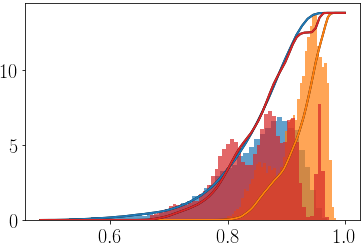

In [48]:
print(fapDf.shape)
h2 = hist(fapDf[:,1]/fapDf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = hist(fapDf[:,2]/fapDf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

#h2 = hist(fapDf[:,4]/fapDf[:,3],51,alpha=0.7,label='A-D',color = 'C2',density=True)
ht2 = hist(fapDf[:,5]/fapDf[:,3],51,label='A-S',color = 'C3',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C0',linewidth=2)


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C1',linewidth=2)

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C3',linewidth=2)

medAS = fapDf[:,5]/fapDf[:,3]
medAS.sort()
medAD = fapDf[:,1]/fapDf[:,0]
medAD.sort()
med2sp = fapDf[:,2]/fapDf[:,0]
med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed])
dmaxs = med2sp-medAS
max(dmaxs)

(25000, 6)
0.9194197936529569 0.9026347520177195 0.9119982715849909


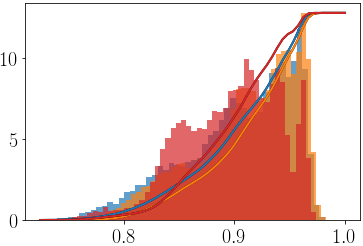

In [174]:
print(fapDf.shape)
h2 = hist(fapDh[:,1]/fapDh[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = hist(fapDh[:,2]/fapDh[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

#h2 = hist(fapDf[:,4]/fapDf[:,3],51,alpha=0.7,label='A-D',color = 'C2',density=True)
ht2 = hist(fapDh[:,5]/fapDh[:,3],51,label='A-S',color = 'C3',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C0',linewidth=2)


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C1',linewidth=2)

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C3',linewidth=2)

medAS = fapDh[:,5]/fapDh[:,3]
medAS.sort()
medAD = fapDh[:,1]/fapDh[:,0]
medAD.sort()
med2sp = fapDh[:,2]/fapDh[:,0]
med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed])


In [41]:
with open("gatinginfo_f_bRn_temp.pickle","rb") as f:
    fapSf1,fapDf1,fap0f1,fapCf1,fdatf1 = pickle.load(f)

Text(0.5, 0, '$V_{soma}$: DiS exc +AS inh')

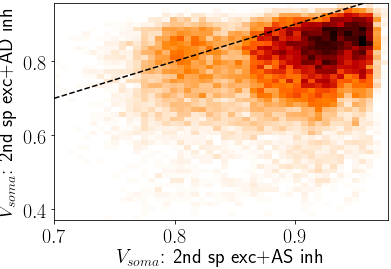

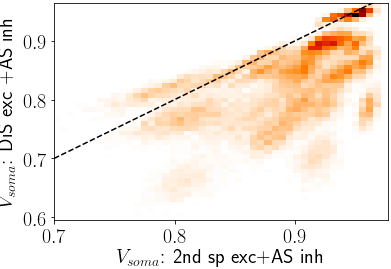

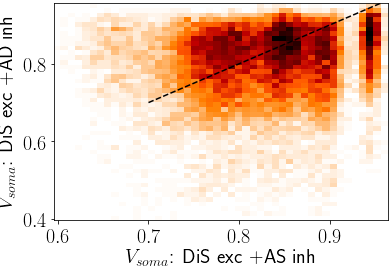

In [49]:
sel = permutation(arange(fapDf.shape[0]))#[:1500]
yt,xt = fapSf[sel,1]/fapSf[sel,0],fapSf[sel,2]/fapSf[sel,0]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: 2nd sp exc+AD inh')
xlabel('$V_{soma}$: 2nd sp exc+AS inh')

figure()
yt,xt = fapSf[sel,5]/fapSf[sel,3],fapSf[sel,2]/fapSf[sel,0]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: DiS exc   +AS inh')
xlabel('$V_{soma}$: 2nd sp exc+AS inh')

figure()
yt,xt = fapSf[sel,4]/fapSf[sel,3],fapSf[sel,5]/fapSf[sel,3]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: DiS exc +AD inh')
xlabel('$V_{soma}$: DiS exc +AS inh')

#figure()
#title('Rneck*2')
#yt,xt = fapDf1[:,5]/fapDf1[:,3],fapDf1[:,2]/fapDf1[:,0]
##scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
##scatter(xt,yt,alpha=0.3)
#counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
##contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
#plot(linspace(0.7,1),linspace(0.7,1),'k--')
#ylabel('$V_D$: DiS exc   +AS inh')
#xlabel('$V_D$: 2nd sp exc+AS inh')


In [122]:
axsp = 1
lab = 'Vspine'
# : $ShntI/ShntI_0$
sel = shleh0[lab][:,1+axsp*5]>exp(-2)
print(exp(-1))
column_stack((shleh0[lab][sel,0],shleh0[lab][sel,1+axsp*5]))


0.36787944117144233


array([[-37.5       ,   0.1599462 ],
       [-30.        ,   0.24325957],
       [-22.5       ,   0.3633654 ],
       [-15.        ,   0.52851841],
       [ -7.5       ,   0.7385429 ],
       [  0.        ,   1.        ],
       [  7.5       ,   0.74343892],
       [ 15.        ,   0.55253843],
       [ 22.5       ,   0.4207566 ],
       [ 30.        ,   0.32600692],
       [ 37.5       ,   0.23661338],
       [ 45.        ,   0.16266146]])

2.233031721114037 1.6057627532946321 0.0007176889079238968 0.727798361731033
5.482868973357116 2.113140178459555 -0.3920236856467585 0.23178173770359903


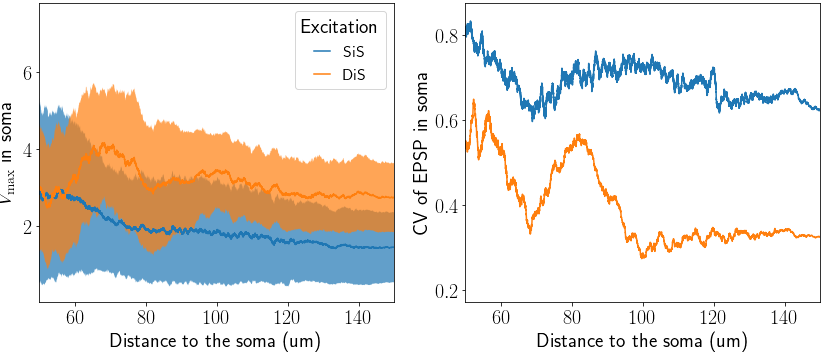

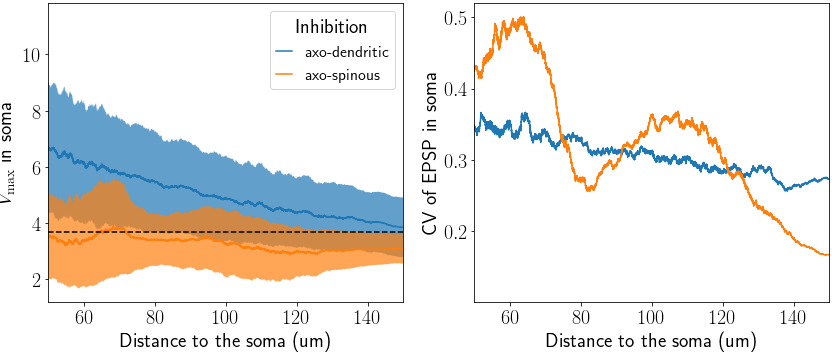

In [124]:
sel = mVs[:,-2] == 1
mVav = mVs[:,2].mean()
s1 = permutation(arange(mVs.shape[0])[sel])
s2 = permutation(arange(mVs.shape[0])[~sel])

fig = figure(figsize=(14,5.5))

fig.add_subplot(121)
xt,yt = mVs[s1,-1],mVs[s1,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt,label='SiS')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)


xt,yt = mVs[s2,-1],mVs[s2,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 200
xt = running_mean(xt,n)
yt2 = running_std(yt,n)

yt = running_mean(yt,n)
plot(xt,yt,label='DiS')
legend(title='Excitation')
ylabel('$V_{\max}$ in soma')
xlabel('Distance to the soma (um)')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)

xlim(50,150)
fig.add_subplot(122)
xt,yt = mVs[s1,-1],mVs[s1,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='SiS')


xt,yt = mVs[s2,-1],mVs[s2,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 200
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='DiS')
ylabel('CV of EPSP in soma')
xlabel('Distance to the soma (um)')

xlim(50,150)
fig = figure(figsize=(14,5.5))

fig.add_subplot(121)
print(mVav,mVs[:,2].std(), mVs[~sel,2].mean()/mVav-1, mVs[~sel,2].std()/mVav)

mVav = mVIs[:,5].mean()
s1 = arange(mVIs.shape[0])
h = axl3.scatter(mVIs[s1,-1],mVIs[s1,5],marker='.',label='axo-dendritic',alpha=0.3)
axl3.scatter(mVIs[s1,-1],mVIs[s1,2],marker='.',label='axo-spinous',alpha=0.3)

xt,yt = mVIs[:,-1],mVIs[:,5]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt,label='axo-dendritic')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)

xt,yt = mVIs[:,-1],mVIs[:,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt,label='axo-spinous')
legend(title='Inhibition')
ylabel('$V_{\max}$ in soma')
xlabel('Distance to the soma (um)')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)
plot(linspace(50,150),linspace(50,150)*0+3.7,'k--')
xlim(50,150)
fig.add_subplot(122)
xt,yt = mVIs[:,-1],mVIs[:,5]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='SiS')


xt,yt = mVIs[:,-1],mVIs[:,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='DiS')
ylabel('CV of EPSP in soma')
xlabel('Distance to the soma (um)')

xlim(50,150)
print(mVav,mVIs[:,5].std(), mVIs[:,2].mean()/mVav-1, mVIs[:,2].std()/mVav)

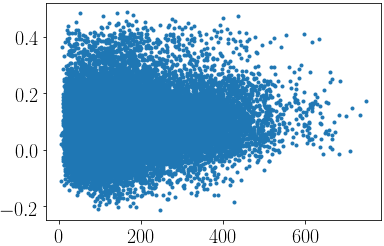

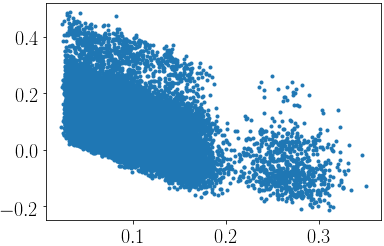

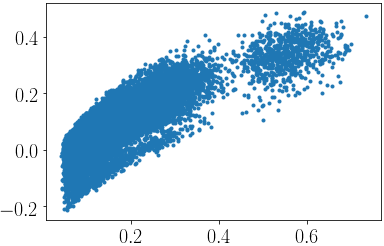

In [195]:
plot(fdatf[:,5]+fdatf[:,4],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')
figure()
plot(fdatf[:,1],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')
figure()
plot(fdatf[:,3],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')

In [196]:
sc = scatter(fdatf[:,1],fdatf[:,3],c= (fap0f[:,2]-fap0f[:,1])/fap0f[:,0],alpha=0.6,cmap='seismic')
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
sc.set_clim(-0.3, 0.3)
plot(linspace(0,0.35),linspace(0,0.35),'k--')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file c9ce4188823ecd80f016c9bda8337627.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>

In [197]:
#taken from http://chris35wills.github.io/matplotlib_diverging_colorbar/
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [198]:
with open("gatinginfo_f.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
x,y,z =fdatf[:,1],fdatf[:,3], (fap0f[:,2]-fap0f[:,1])/fap0f[:,0]
sc = scatter(x,y,c='k',alpha=0.2)
sc = scatter(x,y,c=z,alpha=0.6,cmap='seismic',norm = MidpointNormalize(midpoint = 0., vmin = -0.3, vmax = 0.5))
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
#plot(linspace(0,0.35),0.85*linspace(0,0.35)+0.,'k--')
#plot(linspace(0,0.35),1*linspace(0,0.35)+0.1,'k--')
plot(linspace(0,0.35),1.4*linspace(0,0.35)+0.18,'k--')

triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.3,0.6,0.1), linewidths=0.5, colors='k')
#clabel(TR, inline=1, fontsize=10)
#tricontourf(x, y, z, arange(-0.3,0.6,0.1))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>

Interpretation: When they have the same area, inhibition in shaft does slightly more effect ~0.003? than when it is in DiS. To have the same effect, A_{ish} should be 15% smaller (0.85 A_{ish}???!)? To have 0.1 more effect, A_{ish} has to be 0.1 um^2 larger than A_{iDiS}. And to have 0.2 more effect A_{ish} = 1.4 A_{iDiS} + 0.18

In [199]:
with open("gatinginfo_f_cm1.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
x,y,z =fdatf[:,1],fdatf[:,3], (fap0f[:,2]-fap0f[:,1])/fap0f[:,0]
sc = scatter(x,y,c='k',alpha=0.2)
sc = scatter(x,y,c=z,alpha=0.6,cmap='seismic',norm = MidpointNormalize(midpoint = 0., vmin = -0.3, vmax = 0.5))
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
plot(linspace(0,0.35),0.85*linspace(0,0.35)+0.,'k--')
plot(linspace(0,0.35),1*linspace(0,0.35)+0.1,'k--')
plot(linspace(0,0.35),1.4*linspace(0,0.35)+0.18,'k--')

triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.3,0.6,0.1), linewidths=0.5, colors='k')
#clabel(TR, inline=1, fontsize=10)
#tricontourf(x, y, z, arange(-0.3,0.6,0.1))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>